# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Introduction: Business Problem <a name="introduction"></a>

In this project we will attempt to scope out the most desirable Postal code in Calgary, AB Canada for a new restaurant.

Given changes to city planning, as well as shitfing city demographics, we will be ranking potential areas based on Median Income (those with higher income are always more desirable), the areas Walk Score - this is calculated per community and we will get a median value per postal code area. The last value we will look at is restaurant density (number of restaurants, normalized per 1000 residents) in each area, to get an idea of whether there are already too many/too few restaurants in a given area. 

Given it is an initial look/scoping tool, we will not dive into restaurant type, as that analysis would require information that isn't currently readily available, such as neighbourhood and postal code demographic/ethnicity breakdowns.  That would be a much more detailed follow up analysis.

We will present a ranking, based on the above 3 criteria of the 3 best Postal Codes in Calgary, AB to look at opening a new restaurant

## Data

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* median after tax income in each neighbourhood/postal code
* walk score in each neighbourhood/postal code

Postal Code areas/Neighbourhoods are defined as per the Canada Post guide for postal codes/neighbourhoods in Calgary

Following data sources will be needed to extract/generate the required information:
* list of postal codes/neighbourhoods in Calgary
* population data per postal code
* geographic centers of each postal codes (will be used to conduct restaurant searches with FourSquare)
* postal code/neighbourhood walk scores
* income data per postal code/neighbourhood

#### Import relevent libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### Collecting Data - Postal codes in Calgary
#### Create URL and Beautiful Soup Object f/ Webscraping

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'
data = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')

In [3]:
table = soup.find_all('table')
# list of tables returned. Want 2nd table so table [1]
calgary_communities = table[1]
rows = calgary_communities.find_all('tr')

# set up empty list to use to populate dataframe:
my_list = []

# populate date frame with scrapped data:
for row in rows:
    row_data = []
    column = row.find_all('td')
    for col in column:
        data = col.get_text()
        data = data.strip('\n')
        row_data.append(data)
    my_list.append(row_data)

# append contents of list into dataframe:    
# set up headers for dataframe:
header_col = rows[0].find_all('th')
col_names = []
for i in header_col:
    element = i.get_text()
    element = element.strip('\n')
    col_names.append(element)
df_calgary_communities = pd.DataFrame(my_list, columns = col_names)

# clean up data frame:
# drop first blank row:
df_calgary_communities = df_calgary_communities.drop(0, axis = 0)

# keep only communities within Calgary:
df_calgary_communities = df_calgary_communities[df_calgary_communities['Community'] == 'Calgary']
df_calgary_communities.dtypes

# drop unassigned values:
df_calgary_communities.drop(120, axis = 0, inplace = True)

# reset dataframe index
df_calgary_communities.reset_index(inplace = True)
df_calgary_communities.drop('index', axis = 1, inplace = True)

# check data types - change type of Latitude/Longitude to float from object:
df_calgary_communities['Latitude'] = df_calgary_communities['Latitude'].astype('float')
df_calgary_communities['Longitude'] = df_calgary_communities['Longitude'].astype('float')

# print data frame contents
df_calgary_communities

,Postal Code,Community,Neighbourhood,Latitude,Longitude
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.098000
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.04150,-114.059900
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600


## Collecting Data - Population by Postal Code (Calgary)

In [4]:
pop_url = 'https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&SR=1&S=22&O=A&RPP=9999&PR=0'
pop_data = requests.get(pop_url).text

pop_soup = BeautifulSoup(pop_data, 'html.parser')

In [5]:
pop_table = pop_soup.find_all('table')
pop_tbl = pop_table[0]
# only one table returned
pop_rows = pop_tbl.find_all('tr')

# set up empty list to use to populate dataframe:
pop_list = []

# populate date frame with scrapped data:
# drop the first 3 rowss - header, empty and total Canada population
for row in pop_rows[3:]:
    pop_data = []
    column = row.find_all('td')
    for col in column:
        data = col.get_text()
        data = data.strip('\n')
        pop_data.append(data)
    pop_list.append(pop_data)

# populate data frame with population info:
df_community_pop = pd.DataFrame(pop_list)

# add postal code information to the dataframe
# postal code data storeed in th element - need to append it to the pop_list
txt_list = []
for row in pop_rows[3:]:
    column = row.find_all('th')
    for col in column:
        txt = col.get_text()
        txt = txt.strip('\n')
        txt_list.append(txt)
txt_list

df_community_pop['PostalCode'] = txt_list

# drop column 2 (private sdwleeing occupied by usual residents) - no value in data
# more interested in population and number of dwellings
df_community_pop.drop(2, axis = 1, inplace = True)
    
# set up headers for dataframe:
df_pop_col_names = ['Population (2016)', 'Total Private Dwellings (2016)', 'Postal Code']
df_community_pop.columns = df_pop_col_names

df_community_pop

,Population (2016),Total Private Dwellings (2016),Postal Code
0,"46,587","26,155",A0A
1,"19,792","13,658",A0B
2,"12,587","8,010",A0C
3,"22,294","12,293",A0E
4,"35,266","21,750",A0G
...,...,...,...
1636,500,210,X0G
1637,"20,054","8,093",X1A
1638,"1,641","1,002",Y0A
1639,"6,561","4,870",Y0B


## Cleaning/Merging Data -  Merge Calgary Community DF and Population DF on PostalCode column
#### Will have a full dataframe of Calgary Postal codes and their population data

In [6]:
df_calgary_community_pop = pd.merge(df_calgary_communities, df_community_pop, on = 'Postal Code')
df_calgary_community_pop

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016)
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,"59,641","22,652"
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,"53,224","19,393"
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,"23,418","9,953"
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600,"37,348","15,638"
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,"20,406","8,332"
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.098000,"23,519","12,429"
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400,"34,729","17,958"
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200,"41,415","18,806"
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.04150,-114.059900,"14,370","8,593"
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,"59,025","21,018"


## Collecting Data - Median Income by Postal Code

In [7]:
# community/neighbourhood data from Calgary Mortgage and housing
inc_url = 'https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/TableMatchingCriteria?GeographyType=MetropolitanMajorArea&GeographyId=0140&CategoryLevel1=Population%2C%20Households%20and%20Housing%20Stock&CategoryLevel2=Household%20Income&ColumnField=HouseholdIncomeRange&RowField=Neighbourhood&SearchTags%5B0%5D.Key=Households&SearchTags%5B0%5D.Value=Number&SearchTags%5B1%5D.Key=Statistics&SearchTags%5B1%5D.Value=AverageAndMedian'
inc_data = requests.get(inc_url).text

inc_soup = BeautifulSoup(inc_data, 'html.parser')

In [8]:
inc_table = inc_soup.find_all('table')

# check for number of tables returned
print(len(inc_table))
inc_tbl = inc_table[0]

# only one table returned
inc_rows = inc_tbl.find_all('tr')

1


In [9]:
# set up empty list to use to populate dataframe:
inc_list = []

# populate date frame with scrapped data:
# drop the first 3 rows - header, empty and total Canada population
for row in inc_rows:
    inc_data = []
    column = row.find_all('td')
    for col in column:
        data = col.get_text()
        data = data.strip('\n')
        inc_data.append(data)
    inc_list.append(inc_data)
# remove bad data from first list element
del inc_list[0]

# add community information to the dataframe
# community data storeed in th element - need to append it to the pop_list
comm_list = []
for row in inc_rows:
    column = row.find_all('th')
    for col in column:
        txt = col.get_text()
        txt = txt.strip('\n')
        comm_list.append(txt)

# remove bad data (first 4 entries) from list
del comm_list[0:4]

# populate data frame with population info:
df_community_inc = pd.DataFrame(inc_list)

# add community data to data frame
df_community_inc['Community'] = comm_list

# add column names
inc_col_names = ['Average Household Income Before Taxes', 'Median Household Income Before Taxes', 
                 'Average Household Income After Taxes', 'Median Household Income After Taxes', 'Neighbourhood']
df_community_inc.columns = inc_col_names

# only interested in disposable (after tax income) - choose to use median to lessen affect of unknown outliers
df_community_inc.drop(['Average Household Income Before Taxes', 'Median Household Income Before Taxes', 
                 'Average Household Income After Taxes'], axis = 1, inplace = True)
print(df_community_inc.shape)
df_community_inc.head()

(51, 2)


,Median Household Income After Taxes,Neighbourhood
0,"84,770",Calgary
1,"91,950",Airdrie
2,"93,522",Altadore/South Calgary/CFB Currie/Lincoln Park...
3,"51,403",Bankview
4,"111,906",Bel-Aire/Mayfair/Kelvin Grove/Eagle Ridge/Chin...


In [10]:
# income data comes from a different data source. Will need to assign a postal code manually per each Neighbourhood
# assign a postal code to each group of communities as per CMHC
df_community_inc['Neighbourhood']
df_community_inc_pc = ['', '', 'T2T', 'T2T', 'T2V', 'T3B', 'T2V', 'T2E', 'T2Y', 'T2H', 'T2W', 'T2M', 'T2L', 'T3M', 'T3A', 'T2B', 'T2P', 
                       'T2V', 'T3J', 'T2B', 'T3E', 'T3K', 'T3E', 'T2S', 'T2G', 'T2A', 'T2Z', 'T2A', 'T2S', 'T3B', 'T2M', 'T3E', 'T2K',
                      'T2N', 'T3G', 'T2M', 'T1Y', 'T3E', 'T3C', 'T3A', 'T3L', 'T2C', 'T3H', 'T3H', 'T2L', 'T2E', 'T1Y', 'T3C', 'T2J',
                      'T2S', 'T2K']

# include the postal code in the df_community_inc data frame
df_community_inc['Postal Code'] = df_community_inc_pc

# remove unwanted communities (blank postal code) from data frame
df_community_inc = df_community_inc.drop([0, 1, 9, 13], axis = 0)

In [11]:
# remove Neighbourhood from df_community_inc - data no longer required as it is mapped to a postal code
df_community_inc = df_community_inc.drop('Neighbourhood', axis = 1)

In [12]:
# median household income - change to integer for aggregation
df_community_inc['Median Household Income After Taxes'] = df_community_inc['Median Household Income After Taxes'].str.replace(',', '').astype('int')
df_community_inc.dtypes

Median Household Income After Taxes     int32
Postal Code                            object
dtype: object

In [13]:
# Group Data by Postal Code and average the Median Household Income for further analysis:
df_community_inc = df_community_inc.groupby(['Postal Code']).mean()

In [14]:
print(df_community_inc.shape)
df_community_inc.head()

(27, 1)


,Median Household Income After Taxes
Postal Code,
T1Y,70815.5
T2A,62824.5
T2B,62116.0
T2C,84791.0
T2E,59445.0


## Cleaning/Merging Data - Merge Postal Code Income Information to df_calgary_community_pop

In [15]:
# merge data using s left join to keep all of the data from df_calgary_community_pop:
df_calgary_community_pop = df_calgary_community_pop.join(df_community_inc, on = 'Postal Code', how = 'left', lsuffix = '_pop', rsuffix = '_inc')

In [16]:
# some postal codes (due to the differences in community aming f/ community data to income data) have no income data. 
# Will replace Nan with the value of the column median income:
med_value = df_calgary_community_pop['Median Household Income After Taxes'].median()

# fill Nan with the column median value:
df_calgary_community_pop['Median Household Income After Taxes'].fillna(value = med_value, inplace = True)

In [17]:
# change name of dataframe
df_calgary_info = df_calgary_community_pop
df_calgary_info

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,"59,641","22,652",62824.5
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,"53,224","19,393",90225.0
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,"23,418","9,953",62116.0
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600,"37,348","15,638",61978.0
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,"20,406","8,332",84791.0
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.098000,"23,519","12,429",68201.0
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400,"34,729","17,958",59445.0
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200,"41,415","18,806",76644.0
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.04150,-114.059900,"14,370","8,593",69418.0
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,"59,025","21,018",96005.0


## Collecting Data - Adding Walkability Score to Data Set/Data Frame

In [18]:
# community/neighbourhood walkability score from walkscore.com
walk_url = 'https://www.walkscore.com/CA-AB/Calgary'
walk_data = requests.get(walk_url).text

walk_soup = BeautifulSoup(walk_data, 'html.parser')

In [19]:
walk_table = walk_soup.find_all('table')

# check for number of tables returned
print(len(walk_table))
walk_tbl = walk_table[0]

# only one table returned
walk_rows = walk_tbl.find_all('tr')

1


In [20]:
# set up empty list to use to populate dataframe:
walk_list = []

# populate date frame with scrapped data:
for row in walk_rows:
    walk_data = []
    column = row.find_all('td')
    for col in column:
        data = col.get_text()
        data = data.strip('\n')
        walk_data.append(data)
    walk_list.append(walk_data)


# remove bad data from first list element
del walk_list[0]

# create dataframe
walk_df = pd.DataFrame(walk_list)

# add headers to the dataframe columns - populate manually f/ website
walk_df_cols = ['Rank', 'Neighbourhood', 'Walk Score', 'Transit Score', 'Bike Score', 'Population']
walk_df.columns = walk_df_cols

# can drop rank, Transot Score, Bike Score and Population
walk_df = walk_df.drop(['Rank', 'Transit Score', 'Bike Score', 'Population'], axis = 1)

# add postal code area to each Neighbourhood - again, needs to be searched/done manually from postalcodeinfo.ca:
walk_df_postal_codes = ['T2R', 'T2P', 'T2T', 'T2P', 'T2S', 'T2P', 'T3C', 'T2G', 'T2G', 'T2S', 'T2E', 'T2M', 'T2M', 'T2A', 'T2A', 'T2G', 'T2M', 'T2E',
                       'T2K', 'T2V', 'T2T', 'T2T', 'T3K', 'T2M', 'T3C', 'T2E', 'T3J', 'T3E', 'T2V', 'T2H', 'T2M', 'T2A', 'T3C', 'T2T', 'T2S', 'T2A', 'T2S',
                       'T1Y', 'T2A', 'T2E', 'T3C', 'T2K', 'T2T', 'T2J', 'T2L', 'T1Y', 'T2T', 'T2S', 'T2S', 'T2M', 'T2V', 'T2G', 'T2H', 'T3E', 'T1Y',
                       'T3E', 'T2J', 'T3A', 'T3B', 'T2K', 'T2E', 'T3E', 'T3C', 'T3A', 'T2A', 'T3K', 'T2N', 'T3E', 'T2E', 'T1Y', 'T2Z', 'T2K', 'T2A',
                       'T2L', 'T2S', 'T2M', 'T3J', 'T3J', 'T2V', 'T2Z', 'T3K', 'T2G', 'T2W', 'T2V', 'T2C', 'T3J', 'T3E', 'T2X', 'T2J', 'T2N', 'T2X',
                       'T2A', 'T2W', 'T3G', 'T2J', 'T2V', 'T2L', 'T3B', 'T2V', 'T2N', 'T2C', 'T2E', 'T2Y', 'T2B', 'T2J', 'T2N', 'T3H', 'T2X', 'T3H',
                       'T2W', 'T2Y', 'T2E', 'T2V', 'T3H', 'T3H', 'T2K', 'T2S', 'T2W', 'T3G', 'T3K', 'T2A', 'T3H', 'T3J', 'T2K', 'T2W', 'T3C', 'T3E',
                       'T3C', 'T3E', 'T3G', 'T2Y', 'T2W', 'T3H', 'T3K', 'T3E', 'T3M', 'T3H', 'T3N', 'T2Y', 'T3B', 'T3R', 'T3M', 'T3M', 'T3J', 'T3B',
                       'T3P', 'T2J', 'T1Y', 'T3G', 'T3A', 'T2A', 'T2K', 'T3K', 'T2Z', 'T2N', 'T2Z', 'T3L', 'T2X', 'T3G', 'T2B', 'T2Y', 'T3H', 'T2J',
                       'T2J', 'T2K', 'T2J', 'T3R', 'T2Z', 'T3E', 'T2X', 'T3A', 'T3G', 'T3B', 'T3H', 'T3K', 'T3A', 'T3B', 'T2Y', 'T3A', 'T3B', 'T3R',
                       'T2J', 'T2W', 'T3H', 'T3B']

# add postal code area to walk_df:
walk_df['Postal Code'] = walk_df_postal_codes

# now that we have postal code, can drop community:
walk_df = walk_df.drop('Neighbourhood', axis = 1)

# check data types - walk score is an object - change to integer:
walk_df['Walk Score'] = walk_df['Walk Score'].astype('int')

# group by postal code area and get mean/median walk score:
walk_df = walk_df.groupby(['Postal Code']).mean()

# merge walk_df with df_calgary_info on Postal Code - only worried about walk scores in the communities already listed in df_calgary_info
df_calgary = pd.merge(df_calgary_info, walk_df, on = 'Postal Code')
df_calgary

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,"59,641","22,652",62824.5,50.400000
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,"53,224","19,393",90225.0,27.666667
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,"23,418","9,953",62116.0,29.500000
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600,"37,348","15,638",61978.0,23.000000
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,"20,406","8,332",84791.0,39.500000
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.098000,"23,519","12,429",68201.0,52.571429
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400,"34,729","17,958",59445.0,53.250000
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200,"41,415","18,806",76644.0,40.700000
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.04150,-114.059900,"14,370","8,593",69418.0,64.200000
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,"59,025","21,018",96005.0,28.000000


## Plotting Dadta - Plotting Centers of Calgary Postal Codes

In [21]:
from geopy.geocoders import Nominatim 
import folium

In [22]:
# plot geographical center of Calgary, AB
address = 'Calgary, AB'
geolocator = Nominatim(user_agent='to_expolrer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0460954, -114.065465.


In [23]:
# create a map of Calgary using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start = 10)

# add markers for each neighborhood:
for lat, lng, postalcode, neighborhood in zip(df_calgary['Latitude'], df_calgary['Longitude'], df_calgary['Postal Code'],df_calgary['Neighbourhood']):
    label = '{}; {}'.format(neighborhood, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

## Collecting Data - Foursquare API Information (Number of restaurants in a prescirbed raduis from each Postal Code center)

#### Will do a search of restaurants, using the Foursquare API, that is within 10 km of the centre point of the postal code area to generate a list of most/all restaurants in a postal code area (expecting the search to cross boundaries, so we will filter out duplicates later on)

#### Note: we do not consider 10 km an acceptable walking radius

In [24]:
# Foursquare API Credentials
client_id = '5RVW3EIU3YSZYVPJ3SGA5DRLCDYRN5KUI4GR00YK0NDHY0UO'
client_secret = '5J5NGC0VGV0GCWITLMCO3QJHKDWW22O4NFECEPS0EEMFY4MS'
version = '20210901'
limit = 1000

print('Credentials:')
print('Client ID: ', client_id)
print('Client Secret: ', client_secret)

Credentials:
Client ID:  5RVW3EIU3YSZYVPJ3SGA5DRLCDYRN5KUI4GR00YK0NDHY0UO
Client Secret:  5J5NGC0VGV0GCWITLMCO3QJHKDWW22O4NFECEPS0EEMFY4MS


In [25]:
# explore restaurants within 10 km (10000 m) vicinity of the center of each postal code area in attempt to cover every restaurant in the postal code:
def getNearbyVenues(pc, names, latitudes, longitudes, radius=10000):
    venues_list=[]
    for pc, name, lat, lng in zip(pc, names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            radius, 
            limit)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            pc,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [26]:
# code to convert each neighborhood in df_calgary and create a new dataframe called calgary_venues:
calgary_venues = getNearbyVenues(pc = df_calgary['Postal Code'], names = df_calgary['Neighbourhood'], latitudes = df_calgary['Latitude'], longitudes = df_calgary['Longitude'])

Penbrooke Meadows, Marlborough
Dalhousie, Edgemont, Hamptons, Hidden Valley
Forest Lawn, Dover, Erin Woods
Montgomery, Bowness, Silver Springs, Greenwood
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Bridgeland, Greenview, Zoo, YYC
Lakeview, Glendale, Killarney, Glamorgan
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
Highfield, Burns Industrial
Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge
Queensland, Lake Bonavista, Willow Park, Acadia
Martindale, Taradale, Falconridge, Saddle Ridge
Thorncliffe, Tuxedo Park
Sandstone, MacEwan Glen, Beddington, Harvest Hills, Coventry Hills, Panorama Hills
Brentwood, Collingwood, Nose Hill
Tuscany, Scenic Acres
Mount Pleasant, Capitol Hill, Banff Trail
Cranston, Auburn Bay, Mahogany
Kensington, Westmont, Parkdale, University
Northeast Calgary
City Centre, Calgary To

In [27]:
# check data frame shape and head values:
print(calgary_venues.shape)
calgary_venues.head()

(3334, 8)


,Postal Code,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Tool Shed Brewing Company,51.059774,-113.989669,Brewery
1,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Shawarma Palace,51.037969,-113.979086,Falafel Restaurant
2,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pho Dau Bo,51.037592,-113.963598,Vietnamese Restaurant
3,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Bob Bahan Aquatic & Fitness Centre,51.041609,-113.964319,Gym / Fitness Center
4,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Olive Garden,51.052937,-113.982449,Italian Restaurant


In [28]:
# only interested in restaurant data - keep only venue category that contains restaurant
calgary_venues_filtered = calgary_venues[calgary_venues['Venue Category'].str.contains('Restaurant')]

# print out size and head rows of data frmae to check:
print(calgary_venues_filtered.shape)
calgary_venues_filtered.head()

(899, 8)


,Postal Code,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Shawarma Palace,51.037969,-113.979086,Falafel Restaurant
2,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pho Dau Bo,51.037592,-113.963598,Vietnamese Restaurant
4,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Olive Garden,51.052937,-113.982449,Italian Restaurant
6,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pacific Hut Restaurant,51.036922,-113.988767,Asian Restaurant
7,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pebble Street,51.060969,-113.983924,Chinese Restaurant


In [29]:
# scan dataframe for duplicates (10 km radius means we could be fetching across postal code boundaries):
calgary_venues_filtered = calgary_venues_filtered.drop_duplicates()
print(calgary_venues_filtered.shape)
calgary_venues_filtered.head()

(899, 8)


,Postal Code,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Shawarma Palace,51.037969,-113.979086,Falafel Restaurant
2,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pho Dau Bo,51.037592,-113.963598,Vietnamese Restaurant
4,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Olive Garden,51.052937,-113.982449,Italian Restaurant
6,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pacific Hut Restaurant,51.036922,-113.988767,Asian Restaurant
7,T2A,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,Pebble Street,51.060969,-113.983924,Chinese Restaurant


In [30]:
# interested in a count of each restaurant type, grouped bby postal code
# can drop Venue Name, Neighbourhood and positional information
calgary_venues_filtered = calgary_venues_filtered.drop(['Neighbourhood', 'Venue', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1)
print(calgary_venues_filtered.shape)
calgary_venues_filtered.head()

(899, 2)


,Postal Code,Venue Category
1,T2A,Falafel Restaurant
2,T2A,Vietnamese Restaurant
4,T2A,Italian Restaurant
6,T2A,Asian Restaurant
7,T2A,Chinese Restaurant


In [31]:
# group values by postal code and venue category/restaurant type with a count of each
# check data types of calgary_venues columns
calgary_venues_grouped = calgary_venues_filtered.groupby(['Postal Code', 'Venue Category']).agg({'Venue Category': 'count'})

# rename column to Count
calgary_venues_grouped = calgary_venues_grouped.rename(columns = {'Venue Category': 'Count'})
calgary_venues_grouped

Count
Postal Code Venue Category                
T1Y         American Restaurant          2
            Asian Restaurant             2
            Brazilian Restaurant         1
            Chinese Restaurant           1
            Falafel Restaurant           1
...                                    ...
T3R         Mexican Restaurant           1
            New American Restaurant      1
            Restaurant                   4
            Sushi Restaurant             2
            Vietnamese Restaurant        3

[513 rows x 1 columns]

In [32]:
# reset the index of the calgary_venues_grouped data frame (for merging dataframes later on)
calgary_venues_grouped = calgary_venues_grouped.reset_index()

In [33]:
calgary_venues_grouped

,Postal Code,Venue Category,Count
0,T1Y,American Restaurant,2
1,T1Y,Asian Restaurant,2
2,T1Y,Brazilian Restaurant,1
3,T1Y,Chinese Restaurant,1
4,T1Y,Falafel Restaurant,1
...,...,...,...
508,T3R,Mexican Restaurant,1
509,T3R,New American Restaurant,1
510,T3R,Restaurant,4
511,T3R,Sushi Restaurant,2


## Merging Data - Merge Restaurant data (f/ Foursquare API) with Calgary Postal Code/Neighbourhood data

In [34]:
# merge restaurant data with df_calgary data on Postal Code to get complete data set
df_calgary_venues = pd.merge(df_calgary, calgary_venues_grouped, on = 'Postal Code')
df_calgary_venues

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Venue Category,Count
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,American Restaurant,2
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Asian Restaurant,3
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Cajun / Creole Restaurant,1
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Chinese Restaurant,1
4,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Falafel Restaurant,1
...,...,...,...,...,...,...,...,...,...,...,...
508,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,"68,438","24,669",101028.0,31.4,Middle Eastern Restaurant,1
509,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,"68,438","24,669",101028.0,31.4,Restaurant,6
510,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,"68,438","24,669",101028.0,31.4,Seafood Restaurant,1
511,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,"68,438","24,669",101028.0,31.4,Sushi Restaurant,4


In [35]:
# get the number of restaurants in each postal code:
postal_codes = df_calgary_venues['Postal Code'].unique()
my_dict = {}
for code in postal_codes:
    temp_df = df_calgary_venues[df_calgary_venues['Postal Code'] == code]
    for row in temp_df:
        count = temp_df['Count']
    tot = count.sum()
    my_dict[code] = tot
    
# create a dataframe column from dictionary
df_calgary_venues['Total Restaurants'] = df_calgary_venues['Postal Code'].map(my_dict)

In [36]:
df_calgary_venues.head()

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Venue Category,Count,Total Restaurants
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,American Restaurant,2,31
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Asian Restaurant,3,31
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Cajun / Creole Restaurant,1,31
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Chinese Restaurant,1,31
4,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,"59,641","22,652",62824.5,50.4,Falafel Restaurant,1,31


In [37]:
# check/change data types of data frame
# change population, private dwellings, walk score to integers
df_calgary_venues['Total Private Dwellings (2016)'] = df_calgary_venues['Total Private Dwellings (2016)'].str.replace(',', '').astype('int')
df_calgary_venues['Population (2016)'] = df_calgary_venues['Population (2016)'].str.replace(',', '').astype('int')

In [38]:
df_calgary_venues.head()

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Venue Category,Count,Total Restaurants
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,American Restaurant,2,31
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Asian Restaurant,3,31
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Cajun / Creole Restaurant,1,31
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Chinese Restaurant,1,31
4,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Falafel Restaurant,1,31


## Data cleaning - Normalize Restaurant count

In [39]:
# add a column to the data frame that calculates total Restaurants per 1000 residents:
df_calgary_venues['Restaurants/1000 residents'] = df_calgary_venues['Total Restaurants'] / (df_calgary_venues['Population (2016)'].astype('int64') / 1000)

In [40]:
# add a column to the data frame that calculates total Restaurants per 1000 residences:
df_calgary_venues['Restaurants/1000 residences'] = df_calgary_venues['Total Restaurants'] / (df_calgary_venues['Total Private Dwellings (2016)'].astype('int64') / 1000)

In [41]:
df_calgary_venues

,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Venue Category,Count,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,American Restaurant,2,31,0.519777,1.368533
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Asian Restaurant,3,31,0.519777,1.368533
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Cajun / Creole Restaurant,1,31,0.519777,1.368533
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Chinese Restaurant,1,31,0.519777,1.368533
4,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.4,Falafel Restaurant,1,31,0.519777,1.368533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,68438,24669,101028.0,31.4,Middle Eastern Restaurant,1,25,0.365294,1.013418
509,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,68438,24669,101028.0,31.4,Restaurant,6,25,0.365294,1.013418
510,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,68438,24669,101028.0,31.4,Seafood Restaurant,1,25,0.365294,1.013418
511,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.98730,68438,24669,101028.0,31.4,Sushi Restaurant,4,25,0.365294,1.013418


## Exploratory Analysis

### Looking for Relationships between Postal codes and Income, Walkability and Restaurant Density

### Explore relationships between Population, Private Dwellings, Median Income, Walk Score, Number of Restaurants for each Postal Code area

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

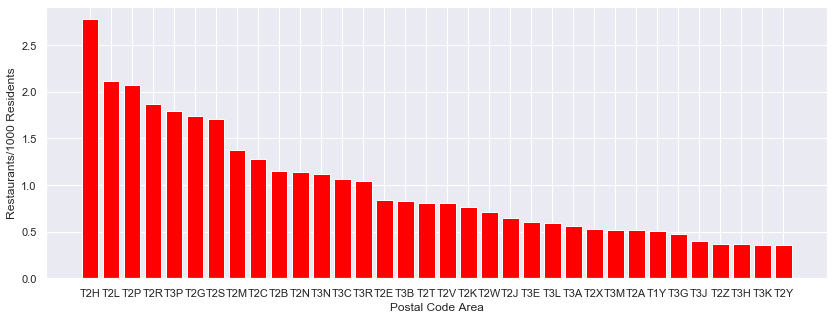

In [43]:
# plot bar chart showing restaurants per 1000 residents by Postal Code Area
# temporary dataframe to list restaurants/1000 residents (descending order) by postal code:

df_1 = df_calgary_venues[['Postal Code', 'Restaurants/1000 residents']].sort_values('Restaurants/1000 residents', ascending = False)

x1 = df_1['Postal Code']
y1 = df_1['Restaurants/1000 residents']

fig1 = plt.subplots(figsize = (14,5))
plt.bar(x1, y1, color = 'red', align = 'center')
plt.xlabel('Postal Code Area')
plt.ylabel('Restaurants/1000 Residents')
plt.show()

#### Note the relationship - some Postal code areas have up to 5x the number of restaurants per 1000 residents. This will need to be explored further - let's check against  income and walkability as a measure

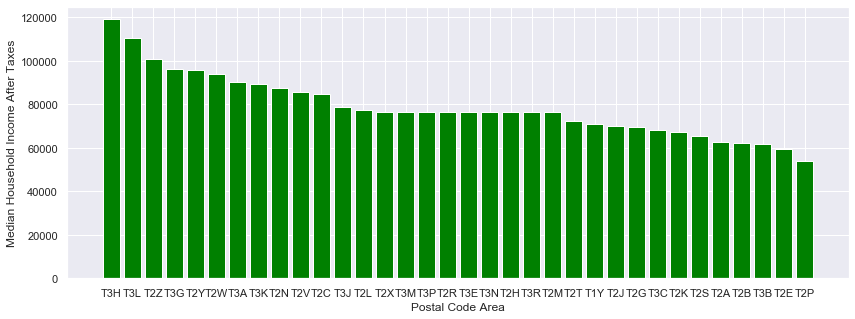

In [44]:
# similar bar plot, this time showing Postal codes and the Median After Tax Income - plotted by Postal codes w/ ascending income
df_2 = df_calgary_venues[['Postal Code', 'Median Household Income After Taxes']].sort_values('Median Household Income After Taxes', ascending = False)
x2 = df_2['Postal Code']
y2 = df_2['Median Household Income After Taxes']

fig2 = plt.subplots(figsize = (14,5))
plt.bar(x2, y2, color = 'green', align = 'center')
plt.xlabel('Postal Code Area')
plt.ylabel('Median Household Income After Taxes')
plt.show()

#### Note the graphing relationships between Number of Restaurants/1000 Redsidents and Median Income are almost inversely proportional - Postal codes with higher incomes (T3H, T3L, T2Z) seem to have less restaurant density. Let's check and see if the same holds up with walkability

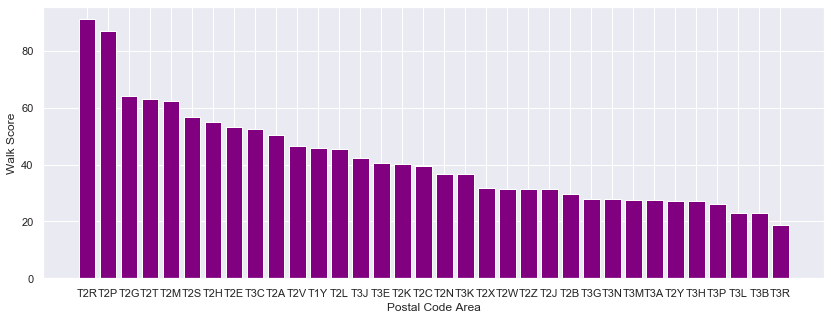

In [45]:
# similar bar plot, this time showing Postal codes and the Walkability Score - plotted by Postal codes w/ ascending score
df_3 = df_calgary_venues[['Postal Code', 'Walk Score']].sort_values('Walk Score', ascending = False)
x3 = df_3['Postal Code']
y3 = df_3['Walk Score']

fig3 = plt.subplots(figsize = (14,5))
plt.bar(x3, y3, color = 'purple', align = 'center')
plt.xlabel('Postal Code Area')
plt.ylabel('Walk Score')
plt.show()

#### Note that the walkability scores are a little less telling. However, there does seem to be a correlation between the number of restaurants in a Postal code area and the walkability score. 

#### Let's put together a Correlation Matrix, comparing the number of restaurants in an area to the Median Income and Walk Score

In [46]:
# create a smaller data frame with postal code, median income, walk score, and number of restaurants/1000 residents
df_4 = df_calgary_venues[['Postal Code', 'Median Household Income After Taxes', 'Walk Score', 'Restaurants/1000 residents']]

In [47]:
# create a correlation matrix
corr_matrix = df_4.corr()
corr_matrix

,Median Household Income After Taxes,Walk Score,Restaurants/1000 residents
Median Household Income After Taxes,1.000000,-0.454394,-0.366446
Walk Score,-0.454394,1.000000,0.556149
Restaurants/1000 residents,-0.366446,0.556149,1.000000


#### Note from the correlation matrix that the assumptions made from grpah analysis hold true:
* there is a moderate negative correlation between Median Income and both Walkability score of the neighbourhood, as well as the number of restaurants/1000 residents
* there is a moderate positive correlation between Walk Score and the number of restaurants per 1000 residents. 

#### Maybe there is a chance to find moderate-higher income communities, with fewer restaurants/1000 residents. We will see if we can discovering via cluster analysis...

## Clustering Algorithm

### Clustering Postal Code areas based on Median Income, Restaurants/1000 residents and Walk Score to determine desirable/undesirable areas to plan an opening. This is intended to be used as a scoping tool, to determine general areas to open a restaurant

In [48]:
# first define a dataframe for analysis
# drop duplicates to ensure we're getting only a single row per postal code

analysis_df = df_calgary_venues[['Median Household Income After Taxes', 'Restaurants/1000 residents', 'Walk Score']].drop_duplicates()
analysis_df = analysis_df.reset_index()

In [49]:
analysis_df = analysis_df.drop('index', axis = 1)

In [50]:
analysis_df

,Median Household Income After Taxes,Restaurants/1000 residents,Walk Score
0,62824.5,0.519777,50.400000
1,90225.0,0.563655,27.666667
2,62116.0,1.152959,29.500000
3,61978.0,0.830031,23.000000
4,84791.0,1.274135,39.500000
5,68201.0,1.062970,52.571429
6,59445.0,0.835037,53.250000
7,76644.0,0.603646,40.700000
8,69418.0,1.739736,64.200000
9,96005.0,0.474375,28.000000


### Clustering - begin with the max number of clusers to be 4

### Tested otheer cluster numbers (from 3 to 7) and 4 seemed to give the best results
* numbers over 4 yielded too many/too small clusters
* numbers less than 4 had too few/too large a cluster

In [51]:
from sklearn.cluster import KMeans

In [52]:
# set up max number of clusters
n = 4

# define algorithm:
kmeans = KMeans(init = 'k-means++', n_clusters = n, random_state = 0)

# fit algorithm:
kmeans.fit(analysis_df)

# labels
labels = kmeans.labels_

In [53]:
# check how many clusters were made:
np.unique(labels)

array([0, 1, 2, 3])

In [54]:
# insert cluster labels into the into new dataframe:
final_analysis_df = df_calgary_venues.drop(['Venue Category', 'Count'], axis = 1)

# drop duplicate values
final_analysis_df = final_analysis_df.drop_duplicates()

# insert cluster labels
final_analysis_df.insert(0, 'Cluster Labels', labels)

final_analysis_df = final_analysis_df.reset_index()
final_analysis_df = final_analysis_df.drop('index', axis = 1)

In [55]:
final_analysis_df

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
0,2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,59641,22652,62824.5,50.400000,31,0.519777,1.368533
1,3,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,53224,19393,90225.0,27.666667,30,0.563655,1.546950
2,2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,23418,9953,62116.0,29.500000,27,1.152959,2.712750
3,2,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600,37348,15638,61978.0,23.000000,31,0.830031,1.982351
4,3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,20406,8332,84791.0,39.500000,26,1.274135,3.120499
5,2,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.098000,23519,12429,68201.0,52.571429,25,1.062970,2.011425
6,2,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400,34729,17958,59445.0,53.250000,29,0.835037,1.614879
7,1,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200,41415,18806,76644.0,40.700000,25,0.603646,1.329363
8,1,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.04150,-114.059900,14370,8593,69418.0,64.200000,25,1.739736,2.909345
9,3,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,59025,21018,96005.0,28.000000,28,0.474375,1.332191


## Visualizing the 4 types of clusters

In [56]:
# import required libraries:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [57]:
# create a map centered in Calgary
cluster_map = folium.Map(location=[latitude, longitude], zoom_start = 12)

# set color scheme for clusters
x = np.arange(n)
ys = [i + x + (i*x)**2 for i in range(n)]


color_list = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in color_list]
    
# add map markers
marker_colors = []
for lat, lon, pc, cluster in zip(final_analysis_df['Latitude'], final_analysis_df['Longitude'], final_analysis_df['Neighbourhood'], final_analysis_df['Cluster Labels']):
    label = folium.Popup(str(pc) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_map)
       
cluster_map

## Cluster Examination - examine each cluster by its label and corresponding Income, Walk Score and Restaurant Density

### Cluster 1 (Cluster Label 0)

In [58]:
final_analysis_df.loc[final_analysis_df['Cluster Labels'] == 0]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
11,0,T3H,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251,25098,119018.5,27.3,26,0.364907,1.035939
17,0,T3L,Calgary,"Tuscany, Scenic Acres",51.1162,-114.2089,30168,10093,110614.0,23.0,18,0.596659,1.783414


### This cluster seems to consist of West Side of Calgary communities - on average higher income, lower walkability and realtively low restaurant density (especially in the T3H code: Discovery ridge, Signal Hill, West Springs). At minimum the T3H postal code requires further investigation

### Cluster 2 (Cluster Label 1)

In [59]:
final_analysis_df.loc[final_analysis_df['Cluster Labels'] == 1]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
7,1,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.0227,-114.1342,41415,18806,76644.0,40.700000,25,0.603646,1.329363
8,1,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,14370,8593,69418.0,64.200000,25,1.739736,2.909345
10,1,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631,9372,4395,76644.0,55.000000,26,2.774221,5.915813
12,1,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,46394,18714,70152.0,31.400000,30,0.646635,1.603078
13,1,T3J,Calgary,"Martindale, Taradale, Falconridge, Saddle Ridge",51.0999,-113.9422,77605,20910,78960.0,42.166667,31,0.399459,1.482544
16,1,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127,14214,6539,77548.0,45.333333,30,2.110595,4.587857
18,1,T2M,Calgary,"Mount Pleasant, Capitol Hill, Banff Trail",51.0696,-114.0862,21086,9925,76435.0,62.285714,29,1.375320,2.921914
19,1,T3M,Calgary,"Cranston, Auburn Bay, Mahogany",50.8902,-113.9892,40268,14202,76644.0,27.666667,21,0.521506,1.478665
21,1,T3N,Calgary,Northeast Calgary,51.1494,-114.0019,12483,4042,76644.0,28.000000,14,1.121525,3.463632
23,1,T3P,Calgary,Symons Valley,51.1793,-114.1333,15578,5038,76644.0,26.000000,28,1.797407,5.557761


###  This is the largest cluster. It consists largely of medium income communities, spread out all over the city (see map above for the purple markers). It consists of medium income communities, with the full range of walkability scores and medium - high restaurant density (the walkability scores and restaurant density are inversely proportional

### In general, since none of these postal codes score particularly high in anything, it is difficult to find any reason to proceed with any of the aforementioned for further analysis

### Cluster 3 (Cluster Label 2)

In [60]:
final_analysis_df.loc[final_analysis_df['Cluster Labels'] == 2]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
0,2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.96432,59641,22652,62824.5,50.400000,31,0.519777,1.368533
2,2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.97860,23418,9953,62116.0,29.500000,27,1.152959,2.712750
3,2,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.16160,37348,15638,61978.0,23.000000,31,0.830031,1.982351
5,2,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.03880,-114.09800,23519,12429,68201.0,52.571429,25,1.062970,2.011425
6,2,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.06140,34729,17958,59445.0,53.250000,29,0.835037,1.614879
14,2,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.08570,-114.07140,35544,15376,67183.5,40.125000,27,0.759622,1.755983
22,2,T2P,Calgary,"City Centre, Calgary Tower",51.04720,-114.08020,13056,8723,53741.0,87.000000,27,2.068015,3.095265
26,2,T2S,Calgary,"Elbow Park, Britannia, Parkhill, Mission",51.01710,-114.08120,14637,8485,65239.0,56.875000,25,1.708000,2.946376


### This cluster is medium sized and is represented by the light blue dots in the map. Note that this cluster, with the exception of a couple of outliers, is centered more towards the city centre of Calgary. It is predminantly made of up lower and medium income families, low-medium walkability and a medium restaurant density. 

### Of all the clusters, this one stands out as the one that is least desirable for a new restaurant business

### Cluster 4 (Cluster Label 3)

In [61]:
final_analysis_df.loc[final_analysis_df['Cluster Labels'] == 3]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
1,3,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,53224,19393,90225.0,27.666667,30,0.563655,1.546950
4,3,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,20406,8332,84791.0,39.500000,26,1.274135,3.120499
9,3,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,59025,21018,96005.0,28.000000,28,0.474375,1.332191
15,3,T3K,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.12700,-114.078700,80792,27353,89515.0,36.714286,29,0.358946,1.060213
20,3,T2N,Calgary,"Kensington, Westmont, Parkdale, University",51.05910,-114.114600,26342,12601,87601.0,36.800000,30,1.138866,2.380763
28,3,T2V,Calgary,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",50.99090,-114.074000,33450,15417,85467.0,46.500000,27,0.807175,1.751313
29,3,T2W,Calgary,"Braeside, Cedarbrae, Woodbine",50.96040,-114.100100,42377,17227,94028.0,31.428571,30,0.707931,1.741452
32,3,T2Y,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.90930,-114.072100,61344,21111,95756.0,27.333333,22,0.358633,1.042111
33,3,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.90230,-113.987300,68438,24669,101028.0,31.400000,25,0.365294,1.013418


### This cluster, again medium in size, consists of higher income communities, again spread throughout the city (see yellow markers in the map). with low-medium walkability and the full spectrum restaurant density. 

### Along with the first cluster this cluster has communities that warrant a closer look

### Now that we have narrowed down the best areas to those contained in 2 clusters (Cluster 1 and 4) - better income (median - high), lower restaurant density and varying walkability scores, let's do another analysis on the 2 clusters in an attempt to break them down in more detail.

### Note that this doesn't suggest that there aren't areas within Cluster 2 & 3 that may be suitable for a new restaurant to open. However, when generalizing an area, it is better to look in Clusters 1 & 4 as a start point

## Second clustering Exercise - further break down of Clusters 1 & 4

In [62]:
# create a data frame with only Custer number 1 & 4 included
cl1_df = final_analysis_df[final_analysis_df['Cluster Labels'] == 0]
cl4_df = final_analysis_df[final_analysis_df['Cluster Labels'] == 3]

# union the data frames
cl14_df = pd.concat([cl1_df, cl4_df])
cl14_df = cl14_df.reset_index()
cl14_df = cl14_df.drop(['index', 'Cluster Labels'], axis = 1)

In [63]:
# create an analysis df using again only Median Income, Walk Score and Restaurant Desnity
cl14_analysis = cl14_df[['Median Household Income After Taxes', 'Restaurants/1000 residents', 'Walk Score']].drop_duplicates()

In [64]:
cl14_analysis

,Median Household Income After Taxes,Restaurants/1000 residents,Walk Score
0,119018.5,0.364907,27.300000
1,110614.0,0.596659,23.000000
2,90225.0,0.563655,27.666667
3,84791.0,1.274135,39.500000
4,96005.0,0.474375,28.000000
5,89515.0,0.358946,36.714286
6,87601.0,1.138866,36.800000
7,85467.0,0.807175,46.500000
8,94028.0,0.707931,31.428571
9,95756.0,0.358633,27.333333


## Clustering #2 - split the 2 clusters into 3 clusters

### Attempted to make 4 clusters, but the 2 communities from cluster #1 ended up just being split into their own, single element clusters (defeating the point of clustering). 3 clusters yielded the same result, with the 2 communities merged into a 2 element cluster

In [65]:
# set up max number of clusters
n1 = 3

# define algorithm:
kmeans2 = KMeans(init = 'k-means++', n_clusters = n1, random_state = 0)

# fit algorithm:
kmeans2.fit(cl14_analysis)

# labels
labels2 = kmeans2.labels_

In [66]:
# check how many clusters were made:
np.unique(labels2)

array([0, 1, 2])

In [67]:
# insert cluster labels to cl14_df
cl14_df.insert(0, 'Cluster Labels', labels2)

In [68]:
cl14_df

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
0,2,T3H,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.05660,-114.181500,71251,25098,119018.5,27.300000,26,0.364907,1.035939
1,2,T3L,Calgary,"Tuscany, Scenic Acres",51.11620,-114.208900,30168,10093,110614.0,23.000000,18,0.596659,1.783414
2,0,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,53224,19393,90225.0,27.666667,30,0.563655,1.546950
3,0,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,20406,8332,84791.0,39.500000,26,1.274135,3.120499
4,1,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.11470,-114.179600,59025,21018,96005.0,28.000000,28,0.474375,1.332191
5,0,T3K,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.12700,-114.078700,80792,27353,89515.0,36.714286,29,0.358946,1.060213
6,0,T2N,Calgary,"Kensington, Westmont, Parkdale, University",51.05910,-114.114600,26342,12601,87601.0,36.800000,30,1.138866,2.380763
7,0,T2V,Calgary,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",50.99090,-114.074000,33450,15417,85467.0,46.500000,27,0.807175,1.751313
8,1,T2W,Calgary,"Braeside, Cedarbrae, Woodbine",50.96040,-114.100100,42377,17227,94028.0,31.428571,30,0.707931,1.741452
9,1,T2Y,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.90930,-114.072100,61344,21111,95756.0,27.333333,22,0.358633,1.042111


### The far West communities still stay in their own cluster, but the cluster 4 was split into 2 different clusters (originally the analysis used 4 clusters, but it left the 2 West communities as their own cluster - when reducing to 3, the only difference was joining together the 2 west communities)

## Visualization - Cluster 1 and 4 broken down into 3 new clusters

In [69]:
# create a map centered in Calgary
cluster_map2 = folium.Map(location=[latitude, longitude], zoom_start = 12)

# set color scheme for clusters
x2 = np.arange(n1)
ys2 = [i + x2 + (i*x2)**2 for i in range(n1)]


color_list2 = cm.rainbow(np.linspace(0, 1, len(ys2)))
rainbow2 = [colors.rgb2hex(i) for i in color_list2]
    
# add map markers
marker_colors2 = []
for lat, lon, pc, cluster in zip(cl14_df['Latitude'], cl14_df['Longitude'], cl14_df['Neighbourhood'], cl14_df['Cluster Labels']):
    label = folium.Popup(str(pc) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow2[cluster-1],
        fill_opacity=0.7).add_to(cluster_map2)
       
cluster_map2

## Cluster analysis of 2nd Clustering Alogorithm:

### Cluster 1 (Cluster Label 0)

In [70]:
cl14_df.loc[cl14_df['Cluster Labels'] == 0]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
2,0,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,53224,19393,90225.0,27.666667,30,0.563655,1.546950
3,0,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.98780,-114.000100,20406,8332,84791.0,39.500000,26,1.274135,3.120499
5,0,T3K,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.12700,-114.078700,80792,27353,89515.0,36.714286,29,0.358946,1.060213
6,0,T2N,Calgary,"Kensington, Westmont, Parkdale, University",51.05910,-114.114600,26342,12601,87601.0,36.800000,30,1.138866,2.380763
7,0,T2V,Calgary,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",50.99090,-114.074000,33450,15417,85467.0,46.500000,27,0.807175,1.751313


### This new cluster, made of communities that were previously in Cluster 4 (original analysis: higher income communities, with low-medium walkability and low - high restaurant density). It now consists of higher income communities with higher walk scores than the other clusters, but on average slightly higher restaurant density. From this cluster the Postal Code T2V looks most promising

### Cluster 2 (Cluster Label 1)

In [71]:
cl14_df.loc[cl14_df['Cluster Labels'] == 1]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
4,1,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796,59025,21018,96005.0,28.000000,28,0.474375,1.332191
8,1,T2W,Calgary,"Braeside, Cedarbrae, Woodbine",50.9604,-114.1001,42377,17227,94028.0,31.428571,30,0.707931,1.741452
9,1,T2Y,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,61344,21111,95756.0,27.333333,22,0.358633,1.042111
10,1,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,68438,24669,101028.0,31.400000,25,0.365294,1.013418


### This new cluster, made of communities that were previously in Cluster 4 (original analysis: higher income communities, with low-medium walkability and low - high restaurant density). It now consists of communities that are still spread throughout the city, with the same high income, but with low restaurant density and low walk scores

### Within this cluster, it is difficult to differentiate a best option, so we will proceed with them all for final analysis

### Cluster 3 (Cluster Label 2)

In [72]:
cl14_df.loc[cl14_df['Cluster Labels'] == 2]

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
0,2,T3H,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251,25098,119018.5,27.3,26,0.364907,1.035939
1,2,T3L,Calgary,"Tuscany, Scenic Acres",51.1162,-114.2089,30168,10093,110614.0,23.0,18,0.596659,1.783414


### This cluster is the same as Cluster 1 in the previous analysis. This cluster seems to consist of West Side of Calgary communities - on average higher income, lower walkability and realtively low restaurant density (especially in the T3H code: Discovery ridge, Signal Hill, West Springs).

### Of the 2 Postal codes within the cluster, the T3H code is certainly more desirable (slightly better walk score, lower restaurant density)

## Final comparison

### Collect data from most promising areas of each cluster 

In [73]:
df1 = cl14_df[cl14_df['Postal Code'] == "T3H"]
df2 = cl14_df[cl14_df['Cluster Labels'] == 1]
df3 = cl14_df[cl14_df['Postal Code'] == 'T2V']

df4 = pd.concat([df1, df2])
df5 = pd.concat([df3, df4])

In [74]:
df5

,Cluster Labels,Postal Code,Community,Neighbourhood,Latitude,Longitude,Population (2016),Total Private Dwellings (2016),Median Household Income After Taxes,Walk Score,Total Restaurants,Restaurants/1000 residents,Restaurants/1000 residences
7,0,T2V,Calgary,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",50.9909,-114.0740,33450,15417,85467.0,46.500000,27,0.807175,1.751313
0,2,T3H,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251,25098,119018.5,27.300000,26,0.364907,1.035939
4,1,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796,59025,21018,96005.0,28.000000,28,0.474375,1.332191
8,1,T2W,Calgary,"Braeside, Cedarbrae, Woodbine",50.9604,-114.1001,42377,17227,94028.0,31.428571,30,0.707931,1.741452
9,1,T2Y,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,61344,21111,95756.0,27.333333,22,0.358633,1.042111
10,1,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,68438,24669,101028.0,31.400000,25,0.365294,1.013418


### Let's weigh each parameter (Median Income, Walk Score, Restaurants/1000 residents) with an equal 1/3 weight, and use a combined weighted score to rank areas

In [75]:
ranking_df = df5[['Postal Code', 'Neighbourhood', 'Median Household Income After Taxes', 'Walk Score', 'Restaurants/1000 residents']]

In [76]:
# will normalize the values of each parameter so that income doesn't dominate the weighted analysis
# will use mean/standard deviation scaling (Standard Scaler) to rank each against the mean value
from sklearn.preprocessing import StandardScaler

# intiiate scaler object
scaler = StandardScaler()

# create a temp_df holding only the numerical parameters of interest
temp_df = ranking_df[['Median Household Income After Taxes', 'Walk Score', 'Restaurants/1000 residents']]

# fit and transform the data
ranking_df_norm = pd.DataFrame(scaler.fit_transform(temp_df), columns = temp_df.columns)

In [77]:
ranking_df_norm

,Median Household Income After Taxes,Walk Score,Restaurants/1000 residents
0,-1.275802,2.159266,1.637358
1,1.995902,-0.698649,-0.824715
2,-0.248211,-0.594454,-0.215314
3,-0.440994,-0.084112,1.084875
4,-0.272492,-0.693687,-0.859642
5,0.241596,-0.088365,-0.822561


In [78]:
# add columns community, neighbourhood to complete dataframe
temp_df2 = ranking_df[['Postal Code', 'Neighbourhood']]

# create temp columns to merge dataframes on:
a = [0,1,2,3,4,5]
temp_df2['temp'] = a
ranking_df_norm['temp'] = a

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
final_ranking_df = pd.merge(temp_df2, ranking_df_norm)
final_ranking_df = final_ranking_df.drop('temp', axis = 1)

In [80]:
final_ranking_df

,Postal Code,Neighbourhood,Median Household Income After Taxes,Walk Score,Restaurants/1000 residents
0,T2V,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",-1.275802,2.159266,1.637358
1,T3H,"Discovery Ridge, Signal Hill, West Springs, Ch...",1.995902,-0.698649,-0.824715
2,T3G,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",-0.248211,-0.594454,-0.215314
3,T2W,"Braeside, Cedarbrae, Woodbine",-0.440994,-0.084112,1.084875
4,T2Y,"Millrise, Somerset, Bridlewood, Evergreen",-0.272492,-0.693687,-0.859642
5,T2Z,"Douglas Glen, McKenzie Lake, Copperfield, East...",0.241596,-0.088365,-0.822561


### Will complete final ranking by multiplying each normalized column by a weight and taking the sum
### Weights adjusted to reflect the fact that income/walk score will be slightly more important than restaurant density
#### Income = 0.4
#### Walk Score = 0.4
#### Restaurans/1000 residents = 0.2

In [81]:
final_ranking_df['Income - Weighted'] = final_ranking_df['Median Household Income After Taxes'] * 0.4
final_ranking_df['Walk Score - Weighted'] = final_ranking_df['Walk Score'] * 0.4
final_ranking_df['Restaurants/1000 residents - Weighted'] = final_ranking_df['Restaurants/1000 residents'] * 0.2

In [82]:
# adda column for the final score - sum up income and walk score (positive), subtract restaurants/1000 residents (to account for lower values being more desirable)
final_ranking_df['Total Score'] = final_ranking_df['Income - Weighted'] + final_ranking_df['Walk Score - Weighted'] - final_ranking_df['Restaurants/1000 residents - Weighted']

In [83]:
final_ranking_df

,Postal Code,Neighbourhood,Median Household Income After Taxes,Walk Score,Restaurants/1000 residents,Income - Weighted,Walk Score - Weighted,Restaurants/1000 residents - Weighted,Total Score
0,T2V,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",-1.275802,2.159266,1.637358,-0.510321,0.863706,0.327472,0.025914
1,T3H,"Discovery Ridge, Signal Hill, West Springs, Ch...",1.995902,-0.698649,-0.824715,0.798361,-0.279459,-0.164943,0.683844
2,T3G,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",-0.248211,-0.594454,-0.215314,-0.099284,-0.237782,-0.043063,-0.294003
3,T2W,"Braeside, Cedarbrae, Woodbine",-0.440994,-0.084112,1.084875,-0.176398,-0.033645,0.216975,-0.427017
4,T2Y,"Millrise, Somerset, Bridlewood, Evergreen",-0.272492,-0.693687,-0.859642,-0.108997,-0.277475,-0.171928,-0.214543
5,T2Z,"Douglas Glen, McKenzie Lake, Copperfield, East...",0.241596,-0.088365,-0.822561,0.096639,-0.035346,-0.164512,0.225805


### Final Analysis: as a scoping tool, we will pick outthe 3 areas which look to be the most prospective to open a new restaurant

In [84]:
temp_df3 = final_ranking_df[['Postal Code', 'Neighbourhood', 'Income - Weighted', 'Walk Score - Weighted', 'Restaurants/1000 residents - Weighted', 'Total Score']]

# the top 3 are the areas with scores > 0, will truncate the df to only include those and sort on the total score:
presentation_df = temp_df3[temp_df3['Total Score'] >= 0]
presentation_df = presentation_df.sort_values('Total Score', ascending = False)

# df clean up: reset index and drop any unnecessary columns:
presentation_df = presentation_df.reset_index()
presentation_df = presentation_df.drop('index', axis = 1)

In [85]:
presentation_df

,Postal Code,Neighbourhood,Income - Weighted,Walk Score - Weighted,Restaurants/1000 residents - Weighted,Total Score
0,T3H,"Discovery Ridge, Signal Hill, West Springs, Ch...",0.798361,-0.279459,-0.164943,0.683844
1,T2Z,"Douglas Glen, McKenzie Lake, Copperfield, East...",0.096639,-0.035346,-0.164512,0.225805
2,T2V,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",-0.510321,0.863706,0.327472,0.025914


In [86]:
# add lat/long and rank to dataframe
temp_df4 = df5[['Postal Code', 'Latitude', 'Longitude']]
presentation_df = pd.merge(presentation_df, temp_df4)

rank = [1, 2, 3]
presentation_df['Rank'] = rank

In [87]:
presentation_df

,Postal Code,Neighbourhood,Income - Weighted,Walk Score - Weighted,Restaurants/1000 residents - Weighted,Total Score,Latitude,Longitude,Rank
0,T3H,"Discovery Ridge, Signal Hill, West Springs, Ch...",0.798361,-0.279459,-0.164943,0.683844,51.0566,-114.1815,1
1,T2Z,"Douglas Glen, McKenzie Lake, Copperfield, East...",0.096639,-0.035346,-0.164512,0.225805,50.9023,-113.9873,2
2,T2V,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",-0.510321,0.863706,0.327472,0.025914,50.9909,-114.0740,3


### So, the 3 most promising Postal Code areas, weighted by Income, Walk Score and Restaurant Density are:
#### 1. T3H: Discovery Ridge, Signal Hill, West Springs
#### 2. T2Z: Douglas Glen, McKenzie Lake, Copperfield
#### 3. T2V: Oak Ridge, Haysboro, Kingsland

#### Note that further study can be completed, diving deeper into individual communities to further analyze/segregate. However, it would require access to community level daya, which is not available for all parameters

## Final Map - Top 3

In [88]:
# create a map centered in Calgary
final_map = folium.Map(location=[latitude, longitude], zoom_start = 12)

# set color scheme for 1, 2, 3 rank
n2 = len(presentation_df['Rank'])
x3 = np.arange(n2)
ys3 = [i + x3 + (i*x3)**2 for i in range(n2)]


color_list3 = cm.rainbow(np.linspace(0, 1, len(ys3)))
rainbow3 = [colors.rgb2hex(i) for i in color_list3]
    
# add map markers
marker_colors3 = []
for lat, lon, pc, rank in zip(presentation_df['Latitude'], presentation_df['Longitude'], presentation_df['Neighbourhood'], presentation_df['Rank']):
    label = folium.Popup(str(pc) + ' Ranking: ' + str(rank), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow3[rank-1],
        fill=True,
        fill_color=rainbow3[rank-1],
        fill_opacity=0.7).add_to(final_map)
       
final_map